# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.


The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Data Dictionary


ID Unique Identifier for a row

Gender Gender of the Customer

Age Age of the Customer (in Years)

Region_Code Code of the Region for the customers

Occupation Occupation Type for the customer

Channel_Code Acquisition Channel Code for the Customer  (Encoded)

Vintage  Vintage for the Customer (In Months)

Credit_Product If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance Average Account Balance for the Customer in last 12 Months

Is_Active If the Customer is Active in last 3 Months

Is_Lead(Target) If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
##Loading data from train.csv file Train

df = pd.read_csv("train.csv")
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
#Loading data from test.csv file 
test = pd.read_csv("test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [4]:
# Loading data from submission.csv file

submission_df = pd.read_csv("sample_submission_eyYijxG_UYrG05O_mfI9LlW.csv")
submission_df.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [5]:
df.shape

(245725, 11)

In [6]:
test.shape

(105312, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [9]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [10]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [11]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Only the Credit_Product column is having null values.

## Checking for Class Imbalance

In [13]:
leads=df['Is_Lead'].value_counts()
lead=leads[0]/df['Is_Lead'].count()*100
not_lead=leads[1]/df['Is_Lead'].count()*100

In [14]:
lead, not_lead

(76.27917387323228, 23.720826126767726)

## EDA

In [15]:
list(df.columns)

['ID',
 'Gender',
 'Age',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Vintage',
 'Credit_Product',
 'Avg_Account_Balance',
 'Is_Active',
 'Is_Lead']

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

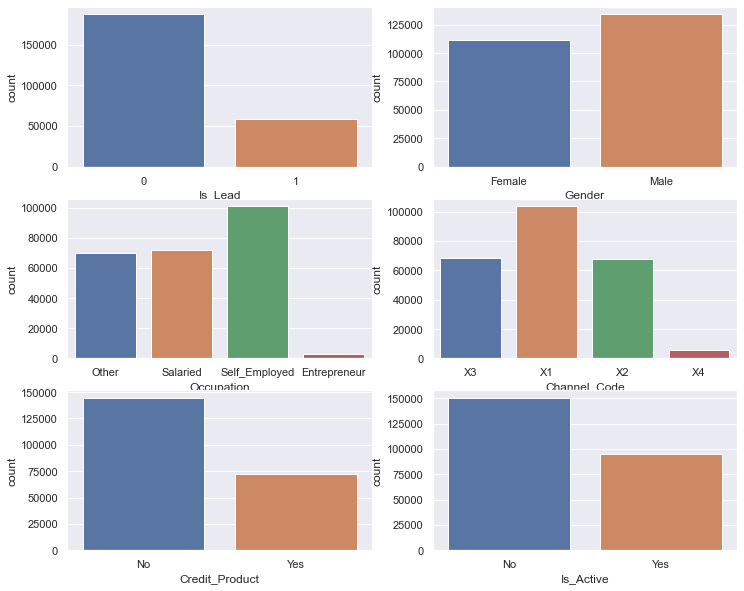

In [16]:
# for train data

fig,ax = plt.subplots(3,2,figsize=(12,10))
sns.countplot('Is_Lead',data=df,ax=ax[0][0])
sns.countplot('Gender',data=df, ax=ax[0][1])
sns.countplot('Occupation',data=df,ax=ax[1][0])
sns.countplot('Channel_Code',data=df,ax=ax[1][1])
sns.countplot('Credit_Product',data=df,ax=ax[2][0])
sns.countplot('Is_Active',data=df,ax=ax[2][1])

- In Is_Lead the majority class is 0.
- In Gender Variable the majority class is Male.
- In occupation variable the majority class is Self_employed.
- In Channel_code the majority class is X1.
- In Credit_product the majority class is No.
- In Is_Active variable majority class is No.

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

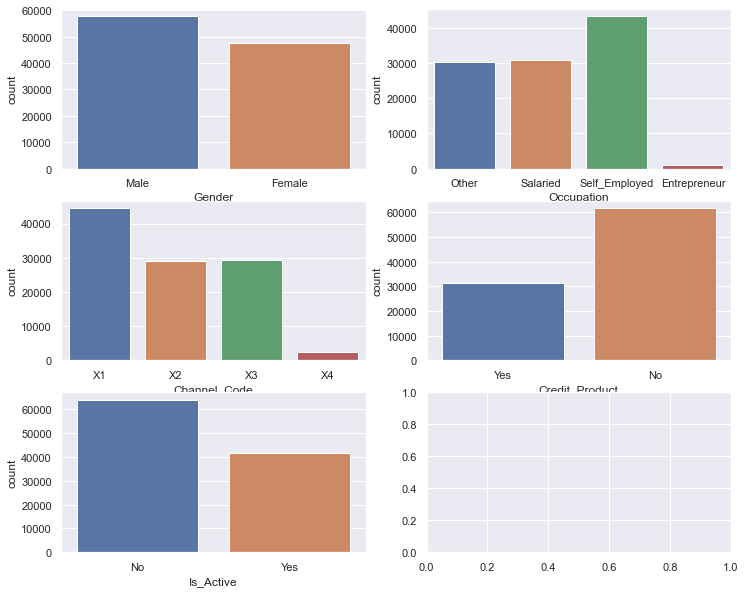

In [17]:
# for test data

fig,ax = plt.subplots(3,2,figsize=(12,10))
sns.countplot('Gender',data=test, ax=ax[0][0])
sns.countplot('Occupation',data=test,ax=ax[0][1])
sns.countplot('Channel_Code',data=test,ax=ax[1][0])
sns.countplot('Credit_Product',data=test,ax=ax[1][1])
sns.countplot('Is_Active',data=test,ax=ax[2][0])

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

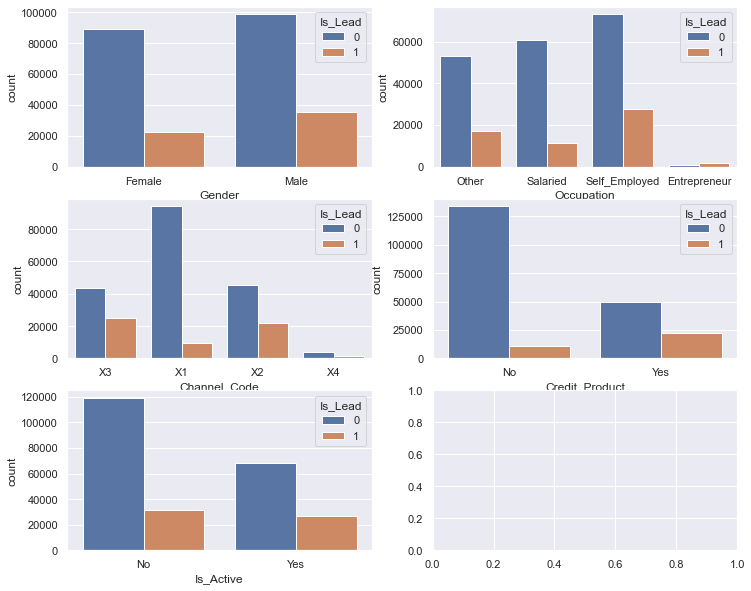

In [18]:
# for train data

fig,ax = plt.subplots(3,2,figsize=(12,10))
sns.countplot('Gender',data=df,hue ='Is_Lead', ax=ax[0][0])
sns.countplot('Occupation',data=df,hue ='Is_Lead',ax=ax[0][1])
sns.countplot('Channel_Code',data=df,hue ='Is_Lead',ax=ax[1][0])
sns.countplot('Credit_Product',data=df,hue ='Is_Lead',ax=ax[1][1])
sns.countplot('Is_Active',data=df,hue ='Is_Lead',ax=ax[2][0])

- From gender variable we can see that Male section has more number of leads that Female section.
- From Occupation variable Entrepreneur section has better lead counts compared to not leads. Max number of leads are generated from Self_employed section followed by Other section.
- In Channel_Code variable maximum number of leads are generated from X3 followed by X2, where as X1 has maximum number of not_leads.
- From Credit_Product variable we can observe people having credit_products are becoming a lead.

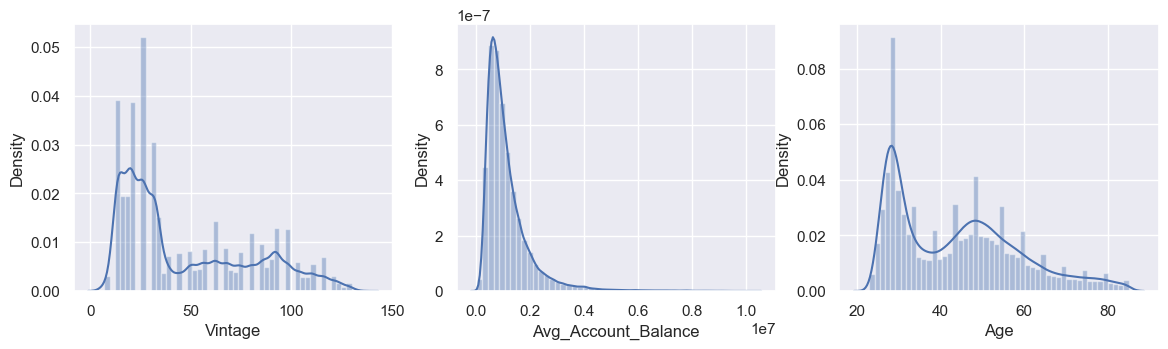

In [19]:
# for train data

num_col = ["Vintage" , "Avg_Account_Balance", "Age"]

plt.figure(figsize=(14, 12), dpi=100)
for i, feature in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[feature])


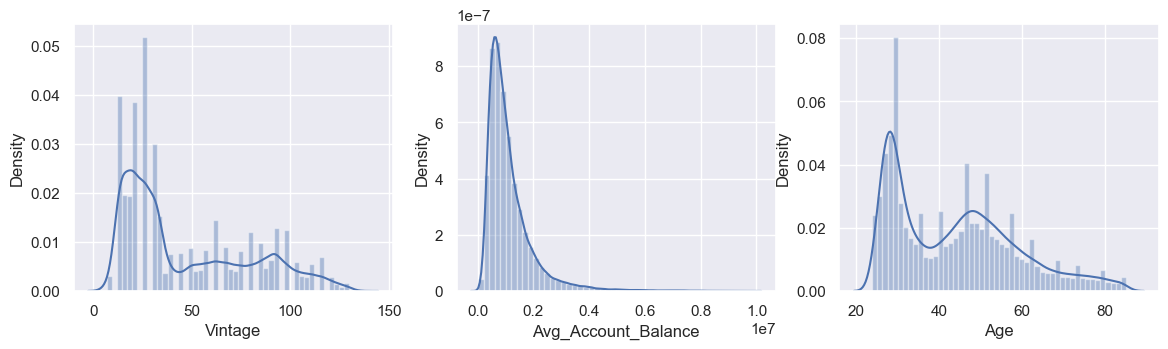

In [20]:
# for test data

num_col = ["Vintage" , "Avg_Account_Balance", "Age"]

plt.figure(figsize=(14, 12), dpi=100)
for i, feature in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.distplot(test[feature])


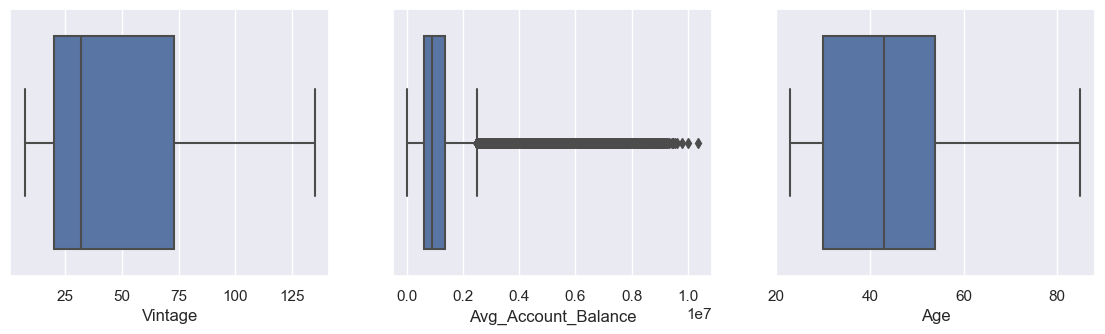

In [21]:
#box plot for train data


plt.figure(figsize=(14, 12), dpi=100)
for i, feature in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[feature])


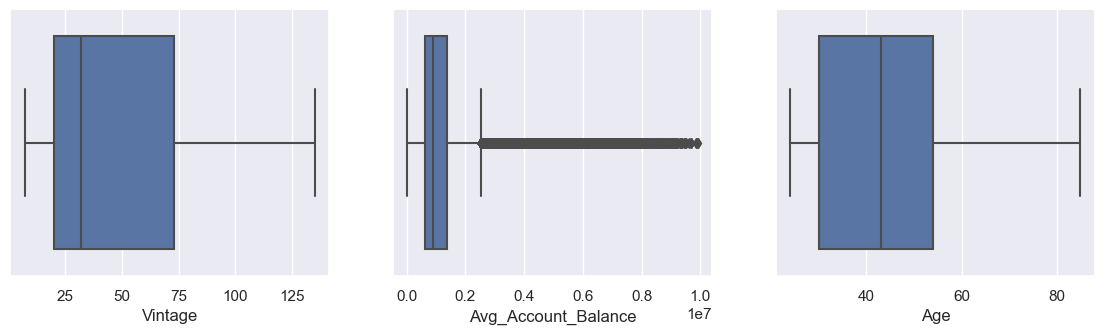

In [22]:
# plot box plot for test data


plt.figure(figsize=(14, 12), dpi=100)
for i, feature in enumerate(num_col):
    plt.subplot(3, 3, i+1)
    sns.boxplot(test[feature])


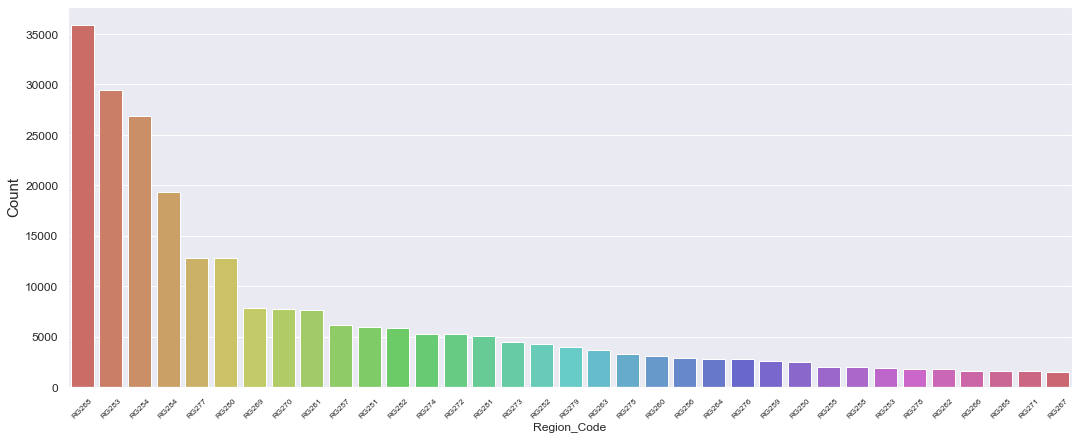

In [23]:
#for train data

cat_col_1 = ['Region_Code']

for cols in cat_col_1:
    plt.figure(figsize=(18,7))
    sns.countplot(x=cols, order = df[cols].value_counts().index, data=df, palette="hls")
    plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

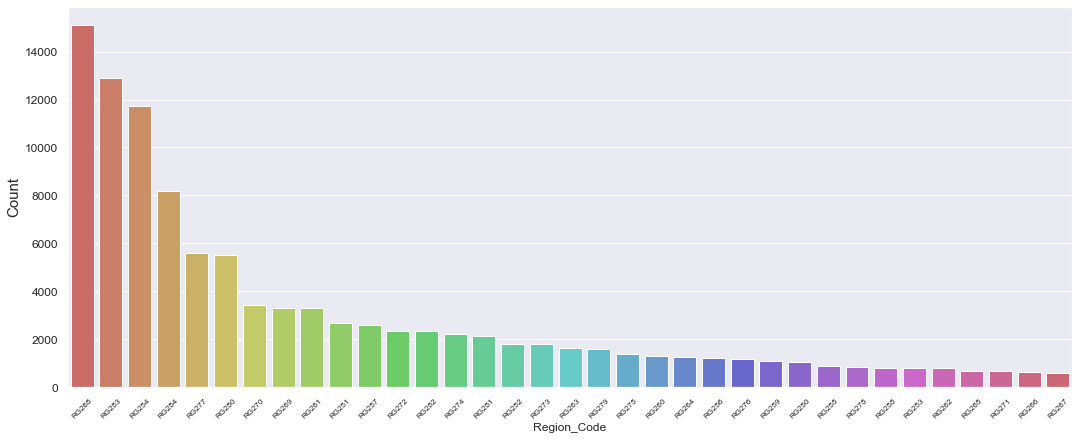

In [24]:
#for test data

cat_col_1 = ['Region_Code']

for cols in cat_col_1:
    plt.figure(figsize=(18,7))
    sns.countplot(x=cols, order = test[cols].value_counts().index, data=test, palette="hls")
    plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

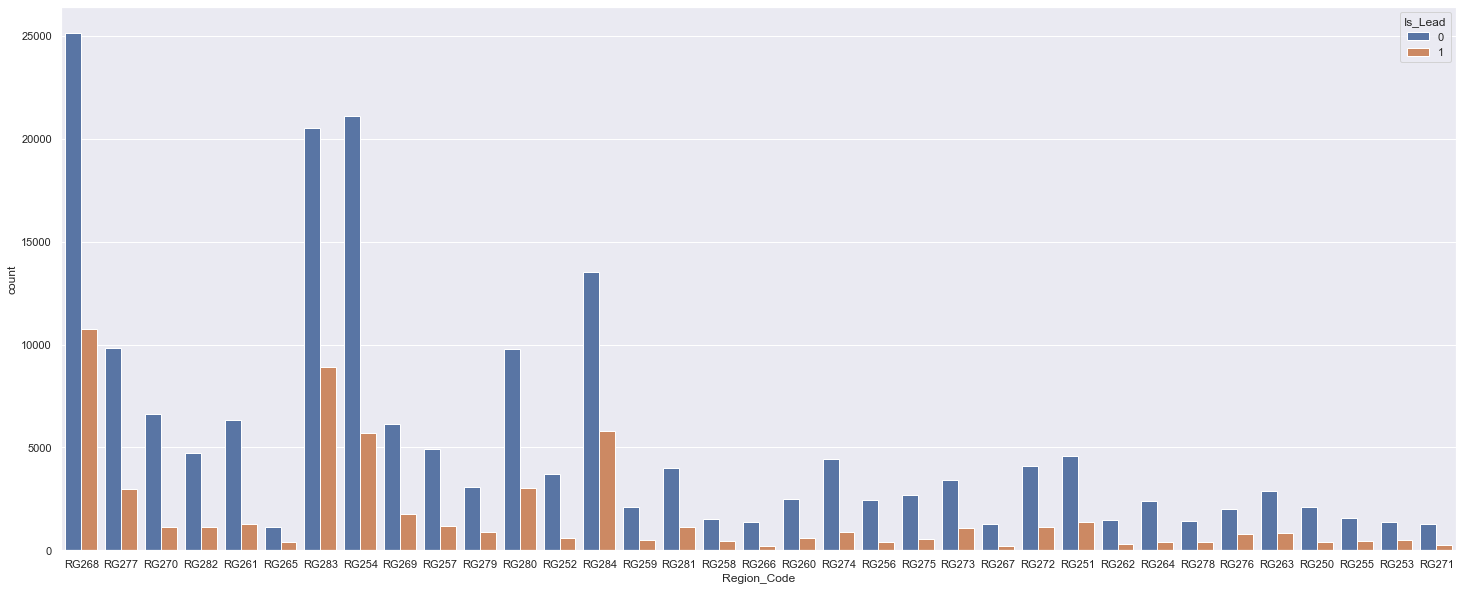

In [25]:
#for train data

plt.figure(figsize=(25, 10))
sns.countplot(df.Region_Code, hue = df.Is_Lead)

- From the above graph we can observe that RG268, RG283, RG284, RG254 are the top four regions in lead generation. 

## Feature Engineering

In [26]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [27]:
df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [28]:
df['Credit_Product'] = df['Credit_Product'].fillna("No info")

In [29]:
df['Credit_Product'].value_counts()

No         144357
Yes         72043
No info     29325
Name: Credit_Product, dtype: int64

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

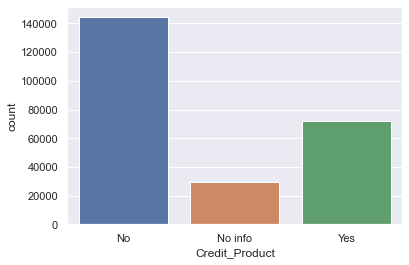

In [30]:
sns.countplot(df['Credit_Product'])

In [31]:
# For test data

test['Credit_Product'] = test['Credit_Product'].fillna("No info")

In [32]:
test['Credit_Product'].value_counts()

No         61608
Yes        31182
No info    12522
Name: Credit_Product, dtype: int64

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

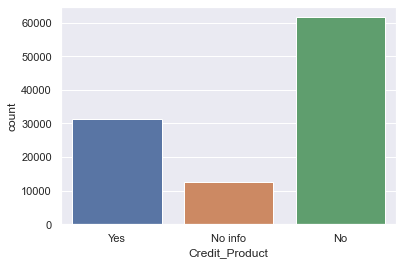

In [33]:
sns.countplot(test['Credit_Product'])

## Age

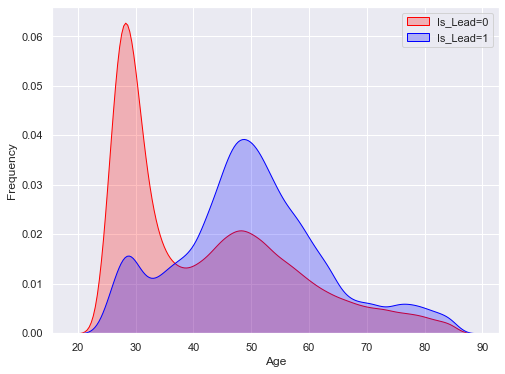

In [34]:
# Explore Size Vs Type using kde plots
plt.figure(figsize=(8, 6))
g = sns.kdeplot(df["Age"][(df["Is_Lead"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Is_Lead"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Is_Lead=0","Is_Lead=1"])

From the above plot it is visible that people in the range of 35-65 are becomin a lead.

so it will be helpful to categorize them in different categories.

In [35]:
df[(df["Age"]>35) & (df["Age"]<65) & (df['Is_Lead']==1)].count()

ID                     43195
Gender                 43195
Age                    43195
Region_Code            43195
Occupation             43195
Channel_Code           43195
Vintage                43195
Credit_Product         43195
Avg_Account_Balance    43195
Is_Active              43195
Is_Lead                43195
dtype: int64

In [36]:
df[(df["Age"]<35) &(df['Is_Lead']==1)].count()

ID                     7396
Gender                 7396
Age                    7396
Region_Code            7396
Occupation             7396
Channel_Code           7396
Vintage                7396
Credit_Product         7396
Avg_Account_Balance    7396
Is_Active              7396
Is_Lead                7396
dtype: int64

In [37]:
df[(df["Age"]>65) &(df['Is_Lead']==1)].count()

ID                     6462
Gender                 6462
Age                    6462
Region_Code            6462
Occupation             6462
Channel_Code           6462
Vintage                6462
Credit_Product         6462
Avg_Account_Balance    6462
Is_Active              6462
Is_Lead                6462
dtype: int64

In [38]:
conditions = [
    (df['Age'] <= 35),
    (df['Age'] >35 ) & (df['Age'] <= 65),
    (df['Age'] > 65)
    ]

In [39]:
values = ['Youth', 'Adult', 'Senior']

In [40]:
df['Age_cat'] = np.select(conditions, values)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_cat
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Senior
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Youth
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Adult
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Youth
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Youth


- Above we have categorize the age group into three sections- "Youth","Adult","Senior".
- As the age range I have taken is not proper according to the names, which can be modified according to business understanding, I have implemented it according to my analysis from the lead generated in different age range.

In [41]:
## For test dataset

conditions = [
    (test['Age'] <= 35),
    (test['Age'] >35 ) & (test['Age'] <= 65),
    (test['Age'] > 65)
    ]

In [42]:
values = ['Youth', 'Adult', 'Senior']

In [43]:
test['Age_cat'] = np.select(conditions, values)
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_cat
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,Youth
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No info,925537,No,Adult
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,Youth
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,Youth
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,Youth


## Occupation

In [44]:
df['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

As we know that Entrepreneurs are also self employed and in this category they are very minor so we can convert Entrepreneurs to Self_Employed.

In [45]:
df['Occupation'].replace({'Entrepreneur':'Self_Employed'},inplace=True)

In [46]:
df['Occupation'].value_counts()

Self_Employed    103553
Salaried          71999
Other             70173
Name: Occupation, dtype: int64

In [47]:
## For test dataset

test['Occupation'].replace({'Entrepreneur':'Self_Employed'},inplace=True)

In [48]:
df['Occupation'].value_counts()

Self_Employed    103553
Salaried          71999
Other             70173
Name: Occupation, dtype: int64

In [49]:
df = df.drop(['Age',"ID"],axis = 1)
df.head()

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_cat
0,Female,RG268,Other,X3,43,No,1045696,No,0,Senior
1,Female,RG277,Salaried,X1,32,No,581988,No,0,Youth
2,Female,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Adult
3,Male,RG270,Salaried,X1,19,No,470454,No,0,Youth
4,Female,RG282,Salaried,X1,33,No,886787,No,0,Youth


In [50]:
test = test.drop(['Age'],axis = 1)
test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_cat
0,VBENBARO,Male,RG254,Other,X1,25,Yes,742366,No,Youth
1,CCMEWNKY,Male,RG268,Other,X2,49,No info,925537,No,Adult
2,VK3KGA9M,Male,RG270,Salaried,X1,14,No,215949,No,Youth
3,TT8RPZVC,Male,RG272,Other,X1,33,No,868070,No,Youth
4,SHQZEYTZ,Female,RG270,Other,X1,19,No,657087,No,Youth


In [51]:
dummy = pd.get_dummies(df[['Gender','Channel_Code', 'Credit_Product', 'Is_Active']],drop_first=True)

df = pd.concat([df,dummy],axis=1)

df = df.drop(['Gender', 'Channel_Code', 'Credit_Product', 'Is_Active'], axis = 1)

df.head()

,Region_Code,Occupation,Vintage,Avg_Account_Balance,Is_Lead,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes
0,RG268,Other,43,1045696,0,Senior,0,0,1,0,0,0,0
1,RG277,Salaried,32,581988,0,Youth,0,0,0,0,0,0,0
2,RG268,Self_Employed,26,1484315,0,Adult,0,0,1,0,0,0,1
3,RG270,Salaried,19,470454,0,Youth,1,0,0,0,0,0,0
4,RG282,Salaried,33,886787,0,Youth,0,0,0,0,0,0,0


In [52]:
dummy = pd.get_dummies(test[['Gender','Channel_Code', 'Credit_Product', 'Is_Active']],drop_first=True)

test = pd.concat([test,dummy],axis=1)

test = test.drop(['Gender', 'Channel_Code', 'Credit_Product', 'Is_Active'], axis = 1)

test.head()

,ID,Region_Code,Occupation,Vintage,Avg_Account_Balance,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes
0,VBENBARO,RG254,Other,25,742366,Youth,1,0,0,0,0,1,0
1,CCMEWNKY,RG268,Other,49,925537,Adult,1,1,0,0,1,0,0
2,VK3KGA9M,RG270,Salaried,14,215949,Youth,1,0,0,0,0,0,0
3,TT8RPZVC,RG272,Other,33,868070,Youth,1,0,0,0,0,0,0
4,SHQZEYTZ,RG270,Other,19,657087,Youth,0,0,0,0,0,0,0


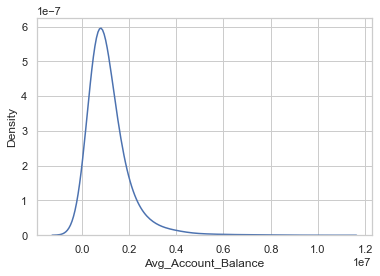

In [53]:
sns.set_style('whitegrid')
sns.kdeplot(df['Avg_Account_Balance'], bw=0.5)
plt.show()

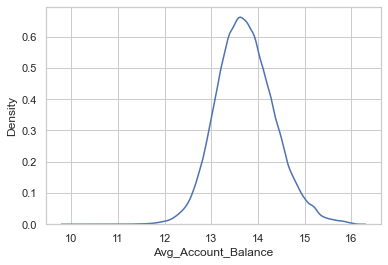

In [54]:
df['Avg_Account_Balance'] = np.log(df['Avg_Account_Balance'])
sns.kdeplot(df['Avg_Account_Balance'])
plt.show()

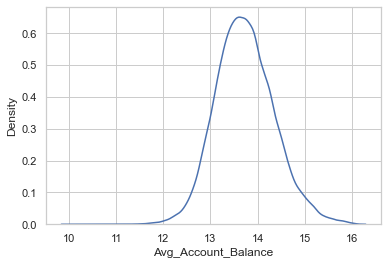

In [55]:
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])
sns.kdeplot(test['Avg_Account_Balance'])
plt.show()

## Encoding Categorical Variables

## Region_Code

In [56]:
ordinal_labels=df[df['Is_Lead']==1]['Region_Code'].value_counts().sort_values().index
ordinal_labels

Index(['RG266', 'RG267', 'RG271', 'RG262', 'RG264', 'RG250', 'RG278', 'RG265',
       'RG256', 'RG258', 'RG255', 'RG253', 'RG259', 'RG275', 'RG252', 'RG260',
       'RG276', 'RG263', 'RG274', 'RG279', 'RG273', 'RG270', 'RG281', 'RG282',
       'RG272', 'RG257', 'RG261', 'RG251', 'RG269', 'RG277', 'RG280', 'RG254',
       'RG284', 'RG283', 'RG268'],
      dtype='object')

In [57]:
enumerate(ordinal_labels,1)

In [58]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,1)}
ordinal_labels2

{'RG266': 1,
 'RG267': 2,
 'RG271': 3,
 'RG262': 4,
 'RG264': 5,
 'RG250': 6,
 'RG278': 7,
 'RG265': 8,
 'RG256': 9,
 'RG258': 10,
 'RG255': 11,
 'RG253': 12,
 'RG259': 13,
 'RG275': 14,
 'RG252': 15,
 'RG260': 16,
 'RG276': 17,
 'RG263': 18,
 'RG274': 19,
 'RG279': 20,
 'RG273': 21,
 'RG270': 22,
 'RG281': 23,
 'RG282': 24,
 'RG272': 25,
 'RG257': 26,
 'RG261': 27,
 'RG251': 28,
 'RG269': 29,
 'RG277': 30,
 'RG280': 31,
 'RG254': 32,
 'RG284': 33,
 'RG283': 34,
 'RG268': 35}

In [59]:
df['Region_Code_ord']=df['Region_Code'].map(ordinal_labels2)
df = df.drop(['Region_Code'],axis = 1)
df.head()

,Occupation,Vintage,Avg_Account_Balance,Is_Lead,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord
0,Other,43,13.860193,0,Senior,0,0,1,0,0,0,0,35
1,Salaried,32,13.274205,0,Youth,0,0,0,0,0,0,0,30
2,Self_Employed,26,14.210464,0,Adult,0,0,1,0,0,0,1,35
3,Salaried,19,13.061453,0,Youth,1,0,0,0,0,0,0,22
4,Salaried,33,13.695360,0,Youth,0,0,0,0,0,0,0,24


In [60]:
test['Region_Code_ord']=test['Region_Code'].map(ordinal_labels2)
test = test.drop(['Region_Code'],axis = 1)
test.head()

,ID,Occupation,Vintage,Avg_Account_Balance,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord
0,VBENBARO,Other,25,13.517598,Youth,1,0,0,0,0,1,0,32
1,CCMEWNKY,Other,49,13.738129,Adult,1,1,0,0,1,0,0,35
2,VK3KGA9M,Salaried,14,12.282798,Youth,1,0,0,0,0,0,0,22
3,TT8RPZVC,Other,33,13.674028,Youth,1,0,0,0,0,0,0,25
4,SHQZEYTZ,Other,19,13.395572,Youth,0,0,0,0,0,0,0,22


## Occupation

In [61]:
ordinal_labels=df[df['Is_Lead']==1]['Occupation'].value_counts().sort_values().index
ordinal_labels

Index(['Salaried', 'Other', 'Self_Employed'], dtype='object')

In [62]:
enumerate(ordinal_labels,1)

In [63]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,1)}
ordinal_labels2

{'Salaried': 1, 'Other': 2, 'Self_Employed': 3}

In [64]:
df['Occupation_ord']=df['Occupation'].map(ordinal_labels2)
df = df.drop(['Occupation'],axis = 1)
df.head()

,Vintage,Avg_Account_Balance,Is_Lead,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord,Occupation_ord
0,43,13.860193,0,Senior,0,0,1,0,0,0,0,35,2
1,32,13.274205,0,Youth,0,0,0,0,0,0,0,30,1
2,26,14.210464,0,Adult,0,0,1,0,0,0,1,35,3
3,19,13.061453,0,Youth,1,0,0,0,0,0,0,22,1
4,33,13.695360,0,Youth,0,0,0,0,0,0,0,24,1


In [65]:
test['Occupation_ord']=test['Occupation'].map(ordinal_labels2)
test = test.drop(['Occupation'],axis = 1)
test.head()

,ID,Vintage,Avg_Account_Balance,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord,Occupation_ord
0,VBENBARO,25,13.517598,Youth,1,0,0,0,0,1,0,32,2
1,CCMEWNKY,49,13.738129,Adult,1,1,0,0,1,0,0,35,2
2,VK3KGA9M,14,12.282798,Youth,1,0,0,0,0,0,0,22,1
3,TT8RPZVC,33,13.674028,Youth,1,0,0,0,0,0,0,25,2
4,SHQZEYTZ,19,13.395572,Youth,0,0,0,0,0,0,0,22,2


## Age_cat

In [66]:
Age_map = {"Youth":1,"Senior":2,"Adult":3}
df['Age_cat'] = df.Age_cat.map(Age_map)
test['Age_cat'] = test.Age_cat.map(Age_map)

In [67]:
df.head()

,Vintage,Avg_Account_Balance,Is_Lead,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord,Occupation_ord
0,43,13.860193,0,2,0,0,1,0,0,0,0,35,2
1,32,13.274205,0,1,0,0,0,0,0,0,0,30,1
2,26,14.210464,0,3,0,0,1,0,0,0,1,35,3
3,19,13.061453,0,1,1,0,0,0,0,0,0,22,1
4,33,13.695360,0,1,0,0,0,0,0,0,0,24,1


In [68]:
test.head()

,ID,Vintage,Avg_Account_Balance,Age_cat,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Region_Code_ord,Occupation_ord
0,VBENBARO,25,13.517598,1,1,0,0,0,0,1,0,32,2
1,CCMEWNKY,49,13.738129,3,1,1,0,0,1,0,0,35,2
2,VK3KGA9M,14,12.282798,1,1,0,0,0,0,0,0,22,1
3,TT8RPZVC,33,13.674028,1,1,0,0,0,0,0,0,25,2
4,SHQZEYTZ,19,13.395572,1,0,0,0,0,0,0,0,22,2


## Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

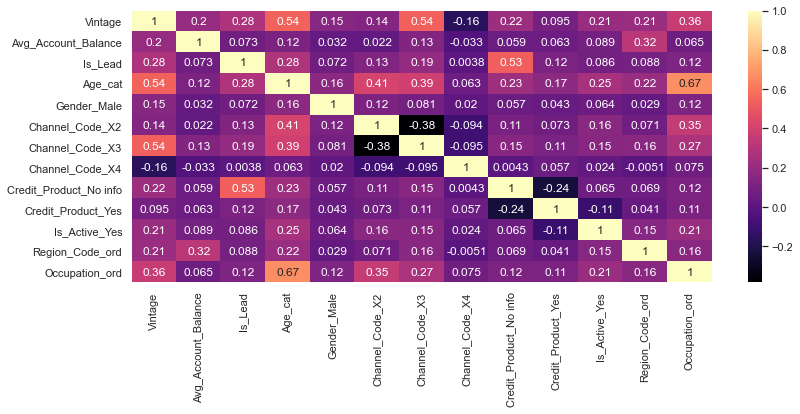

In [69]:
corr_train_df = df.corr()
plt.figure(figsize=(13,5)) 
sns.color_palette("magma", as_cmap=True)
ax = sns.heatmap(corr_train_df, annot=True, cmap="magma")
plt.show

In [70]:
Train = df.drop(["Is_Lead"], axis=1) ## X_train
Test = test ## X_test
Train_Is_Lead = df["Is_Lead"] ## y_train

In [71]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Vintage                 245725 non-null  int64  
 1   Avg_Account_Balance     245725 non-null  float64
 2   Age_cat                 245725 non-null  int64  
 3   Gender_Male             245725 non-null  uint8  
 4   Channel_Code_X2         245725 non-null  uint8  
 5   Channel_Code_X3         245725 non-null  uint8  
 6   Channel_Code_X4         245725 non-null  uint8  
 7   Credit_Product_No info  245725 non-null  uint8  
 8   Credit_Product_Yes      245725 non-null  uint8  
 9   Is_Active_Yes           245725 non-null  uint8  
 10  Region_Code_ord         245725 non-null  int64  
 11  Occupation_ord          245725 non-null  int64  
dtypes: float64(1), int64(4), uint8(7)
memory usage: 11.0 MB


In [72]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      105312 non-null  object 
 1   Vintage                 105312 non-null  int64  
 2   Avg_Account_Balance     105312 non-null  float64
 3   Age_cat                 105312 non-null  int64  
 4   Gender_Male             105312 non-null  uint8  
 5   Channel_Code_X2         105312 non-null  uint8  
 6   Channel_Code_X3         105312 non-null  uint8  
 7   Channel_Code_X4         105312 non-null  uint8  
 8   Credit_Product_No info  105312 non-null  uint8  
 9   Credit_Product_Yes      105312 non-null  uint8  
 10  Is_Active_Yes           105312 non-null  uint8  
 11  Region_Code_ord         105312 non-null  int64  
 12  Occupation_ord          105312 non-null  int64  
dtypes: float64(1), int64(4), object(1), uint8(7)
memory usage: 5.5+ MB


In [73]:
Train_othr = Train.select_dtypes(exclude = ['int64','float64'])
Test_othr = Test.select_dtypes(exclude = ['int64','float64'])

Train_numerical = Train.select_dtypes(include = ['int64','float64'])
col_names_Train = Train_numerical.columns.values.tolist()

Test_numerical = Test.select_dtypes(include = ['int64','float64'])
col_names_Test = Test_numerical.columns.values.tolist()

In [74]:
Train_numerical.head()

,Vintage,Avg_Account_Balance,Age_cat,Region_Code_ord,Occupation_ord
0,43,13.860193,2,35,2
1,32,13.274205,1,30,1
2,26,14.210464,3,35,3
3,19,13.061453,1,22,1
4,33,13.695360,1,24,1


## Scaling Data

In [75]:
# Using standard Scaler - data scaling.

from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

Train_numerical = scaler.fit_transform(Train_numerical.values)
Train_numerical = pd.DataFrame(Train_numerical, columns = col_names_Train)

Test_numerical = scaler.transform(Test_numerical.values)
Test_numerical = pd.DataFrame(Test_numerical, columns = col_names_Test)

In [77]:
train_new_df = pd.concat([Train_othr,pd.DataFrame(Train_numerical),Train_Is_Lead],axis=1)
test_new_df = pd.concat([Test_othr,pd.DataFrame(Test_numerical)],axis=1)

In [78]:
train_new_df.head()

,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Vintage,Avg_Account_Balance,Age_cat,Region_Code_ord,Occupation_ord,Is_Lead
0,0,0,1,0,0,0,0,-0.122373,0.204552,-0.135733,0.925696,-0.153708,0
1,0,0,0,0,0,0,0,-0.462372,-0.740962,-1.194823,0.358983,-1.350704,0
2,0,0,1,0,0,0,1,-0.647825,0.769727,0.923358,0.925696,1.043287,0
3,1,0,0,0,0,0,0,-0.864188,-1.084245,-1.194823,-0.547758,-1.350704,0
4,0,0,0,0,0,0,0,-0.431463,-0.061413,-1.194823,-0.321073,-1.350704,0


In [79]:
test_new_df.head()

,ID,Gender_Male,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No info,Credit_Product_Yes,Is_Active_Yes,Vintage,Avg_Account_Balance,Age_cat,Region_Code_ord,Occupation_ord
0,VBENBARO,1,0,0,0,0,1,0,-0.678734,-0.348239,-1.194823,0.585668,-0.153708
1,CCMEWNKY,1,1,0,0,1,0,0,0.063081,0.007597,0.923358,0.925696,-0.153708
2,VK3KGA9M,1,0,0,0,0,0,0,-1.018733,-2.340635,-1.194823,-0.547758,-1.350704
3,TT8RPZVC,1,0,0,0,0,0,0,-0.431463,-0.095833,-1.194823,-0.207730,-0.153708
4,SHQZEYTZ,0,0,0,0,0,0,0,-0.864188,-0.545133,-1.194823,-0.547758,-0.153708


<function matplotlib.pyplot.show(close=None, block=None)>

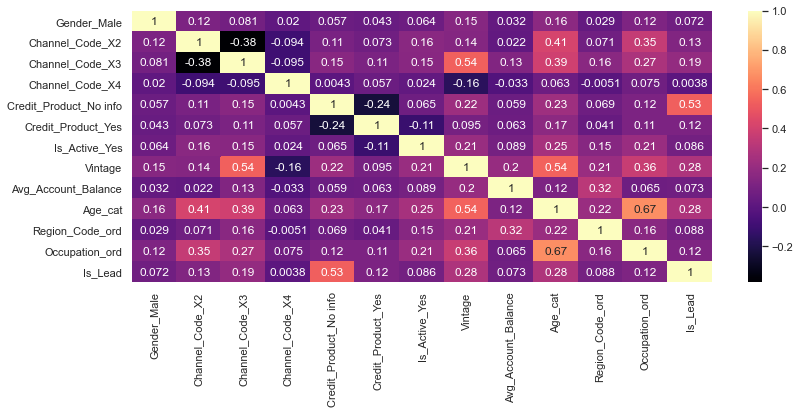

In [80]:
corr_train_df = train_new_df.corr()
plt.figure(figsize=(13,5)) 
sns.color_palette("magma", as_cmap=True)
ax = sns.heatmap(corr_train_df, annot=True, cmap="magma")
plt.show

In [81]:
train_new_df['Avg_Account_Balance'].agg(['skew', 'kurtosis']).transpose()

skew        0.235178
kurtosis    0.306033
Name: Avg_Account_Balance, dtype: float64

## Modelling

In [82]:
# Split the Train data into predictors and target

predictor_train = train_new_df.drop(['Is_Lead'],axis=1)
predictor_test = test_new_df.drop(['ID'], axis =1)
target_train    = train_new_df['Is_Lead']

In [83]:
predictor_test.columns

Index(['Gender_Male', 'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_No info', 'Credit_Product_Yes', 'Is_Active_Yes',
       'Vintage', 'Avg_Account_Balance', 'Age_cat', 'Region_Code_ord',
       'Occupation_ord'],
      dtype='object')

In [84]:
# Scikit-Learn Pre-Processing Libraries
from sklearn.model_selection import KFold

# Model Evaluation Metric & Cross Validation Libraries
from sklearn.metrics import roc_auc_score

# Boosting Algorithm Librarie
import xgboost
from lightgbm import LGBMClassifier

In [85]:
#Creation ML Model,Fine Tune with MODEL Evaluation METRIC - "ROC_AUC" with k-FOLD Cross Validation and Predict Target "Response"


kf=KFold(n_splits=10,shuffle=True)

preds   = list()
y_pred  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train)):    
    
    X_train, y_train = predictor_train.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))

    lg = LGBMClassifier(metric = 'auc', 
                       n_estimators=10000,    
                       bagging_fraction=0.95, 
                       subsample_freq = 2, 
                       objective ="binary",
                       importance_type = "gain",
                        class_weight='balanced',
                       verbosity = -1,
                       random_state=294,
                       num_leaves = 300,
                       boosting_type = 'gbdt',
                       learning_rate=0.15,
                       max_depth=5, 
                       scale_pos_weight=2,
                       n_jobs=-1 
                      )

    lg.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val, y_val)] ,early_stopping_rounds=100 ,verbose=100)

    roc_auc = roc_auc_score(y_val,lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(lg.predict_proba(predictor_test[predictor_test.columns])[:, 1])
    
y_pred_final = np.mean(preds,axis=0)    
submission_df['Is_Lead']=y_pred_final


Fold: 1

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.878324	valid_1's auc: 0.873259

Fold: 2

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.878115	valid_1's auc: 0.873504

Fold: 3

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.878891	valid_1's auc: 0.866148

Fold: 4

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.877808	valid_1's auc: 0.875899

Fold: 5

[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[100]	training's auc: 0.878601	valid_1's auc: 0.868307
[200]	training's auc: 0.884101	valid_1's auc: 0.86788

Fold: 6

[LightGBM] [Warn

In [86]:
print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

ROC_AUC - CV Score: 0.8717515332852127 

Score :  [0.8733288582708966, 0.874021931841187, 0.8667269035755467, 0.8763177466678543, 0.8685026501790716, 0.8701487701398585, 0.8711081290677172, 0.87038933447917, 0.8713471434332807, 0.8756238651975445]


In [87]:
# Download and Show Submission File :

display("sample_submmission",submission_df)
sub_file_name_1 = "AV_Hackathon_Credit_Card_Lead_Predication.csv"
submission_df.to_csv(sub_file_name_1,index=False)
submission_df.head(5)

'sample_submmission'

,ID,Is_Lead
0,VBENBARO,0.302005
1,CCMEWNKY,0.972895
2,VK3KGA9M,0.292567
3,TT8RPZVC,0.136785
4,SHQZEYTZ,0.137564
...,...,...
105307,DBENJOYI,0.993951
105308,CWQ72DWS,0.873969
105309,HDESC8GU,0.305588
105310,2PW4SFCA,0.620103


,ID,Is_Lead
0,VBENBARO,0.302005
1,CCMEWNKY,0.972895
2,VK3KGA9M,0.292567
3,TT8RPZVC,0.136785
4,SHQZEYTZ,0.137564
